# 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Read the data as a data frame

In [33]:
data = pd.read_csv('bank-full.csv')

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Print the descriptive statistics of each & every column using describe() function

    - Most of the numeric features look fine except for Balance & PDays
    - There is a min negative value listed for Balance - how can balance be negative ?
    - There are negative values for pdays - how can it be negative ?

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


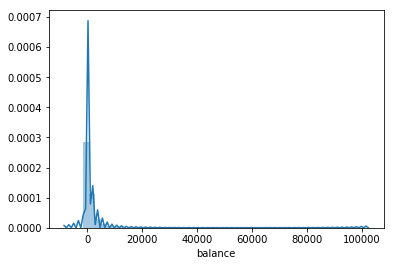

In [6]:
sns.distplot(data['balance'])

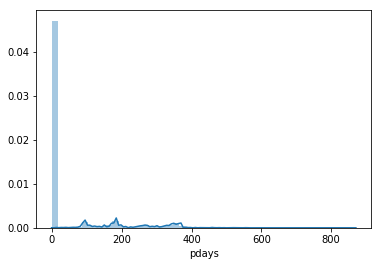

In [7]:
sns.distplot(data['pdays'])

# 3. EDA

### 3.1 Shape of the data

In [8]:
print (data.shape)

(45211, 17)


### 3.2 Data type of each attribute

In [9]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

### 3.3 Checking the presence of missing values

In [10]:
# Check for missing value
data.isna().sum()

### We see that there no missing values in the dataset.

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

### 3.4 Five point summary of numerical attributes

### 3.5 Checking the presence of outliers

### 3.6 Understanding more about categorical variables

In [38]:
job_type_counts = data['job'].value_counts()
print (job_type_counts)
#sns.barplot(job_type_counts.index, job_type_counts.values)

### Finding - Some of the data points have 'unknown' job type - TBC if this is acceptable or needs imputation

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


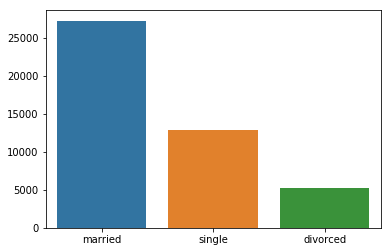

In [12]:
job_type_counts = data['marital'].value_counts()
sns.barplot(job_type_counts.index, job_type_counts.values)

### Finding - All data points have valid marital status

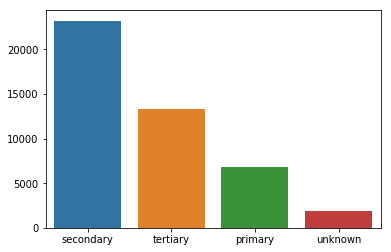

In [13]:
job_type_counts = data['education'].value_counts()
sns.barplot(job_type_counts.index, job_type_counts.values)

### Finding - Some of the data points have 'unknown' education type - This seems to be an acceptable value

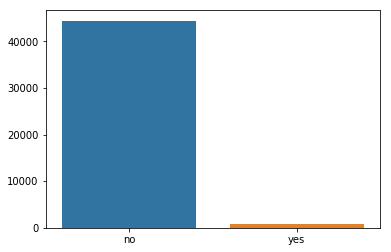

In [14]:
job_type_counts = data['default'].value_counts()
sns.barplot(job_type_counts.index, job_type_counts.values)

### Finding - All data points have valid values for 'default' feature

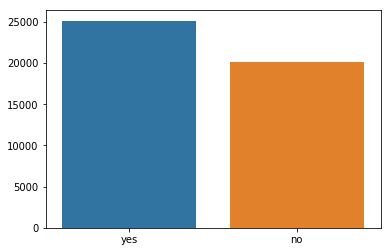

In [15]:
job_type_counts = data['housing'].value_counts()
sns.barplot(job_type_counts.index, job_type_counts.values)

### Finding - All records have valid values for 'housing' feature

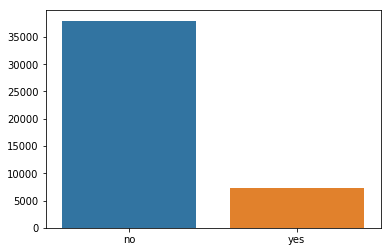

In [16]:
job_type_counts = data['loan'].value_counts()
sns.barplot(job_type_counts.index, job_type_counts.values)

### Finding - All records have valid values for 'loan' feature

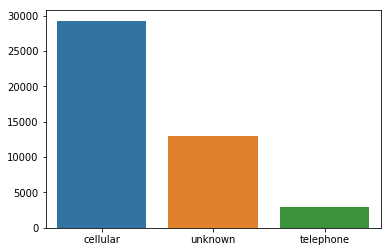

In [17]:
job_type_counts = data['contact'].value_counts()
sns.barplot(job_type_counts.index, job_type_counts.values)

### Finding - Some of the records have 'unknown' contact type. 
### This isn't mentioned to be a valid value and hence we need to find a way to deal with it.
### For now we will go ahead and remove these rows.

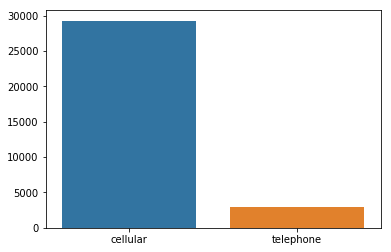

In [18]:
data['contact'].replace("unknown",np.nan, inplace=True)
data['contact'].dropna(inplace=True)

job_type_counts = data['contact'].value_counts()
sns.barplot(job_type_counts.index, job_type_counts.values)

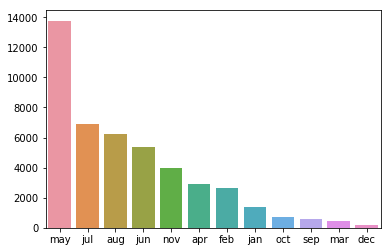

In [19]:
job_type_counts = data['month'].value_counts()
sns.barplot(job_type_counts.index, job_type_counts.values)

### Finding - All records have valid values for 'month' feature

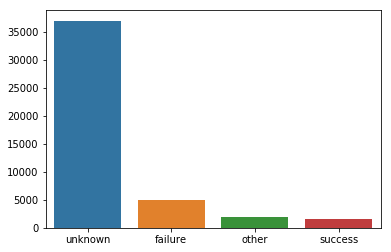

In [34]:
job_type_counts = data['poutcome'].value_counts()
sns.barplot(job_type_counts.index, job_type_counts.values)

### Finding - Some of the records have 'unknown' and 'other' poutcome. Feature documentation suggests that there should
### be three values of 'success', 'failure' and 'nonexistent', so we will convert accordingly.

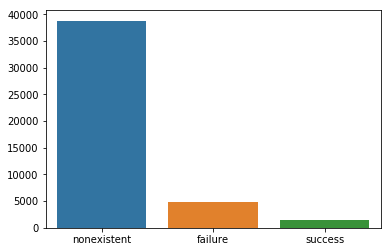

In [36]:
data['poutcome']=np.where(data['poutcome']=='unknown','nonexistent',data['poutcome'])
data['poutcome']=np.where(data['poutcome']=='other','nonexistent',data['poutcome'])

job_type_counts = data['poutcome'].value_counts()
sns.barplot(job_type_counts.index, job_type_counts.values)

### 3.7 See the distribution of 'Class' variable and plot it using appropriate graph

In [37]:
data.groupby('Target').agg({'Target':'count'})

### Finding -> We see that majority of people contact had not accepted the offer

,Target
Target,
no,39922
yes,5289


# 4. Prepare the data to train a model 

### 4.1 Get rid of the missing values

# 5. Standard Classification Algorithms Training & Evaluation

# 6. Ensemble Algorithms Training & Evaluation

# 7. Compare Performance of All Models